<a href="https://colab.research.google.com/github/niruthikka24/Intro-to-ML-Labs/blob/main/Lab%201/Lab_Activity_01_Feature_Engineering_%26_Pre_Processing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot

from scipy import stats
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression

In [ ]:
uploaded = files.upload()

Saving cleaned_train2.csv to cleaned_train2.csv


In [ ]:
df = pd.read_csv('cleaned_train2.csv')
df.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [ ]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [ ]:
df['x5log'] = np.log(df['x5'])
df['x6log'] = np.log(df['x6'])
df['x8inverse'] = np.reciprocal(df['x8'])
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y,x5log,x6log,x8inverse
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6,1.824549,-3.473768,0.023810
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6,0.470004,-2.764621,0.027778
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7,1.526056,-3.611918,0.034483
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6,0.530628,-3.057608,0.062500
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6,-0.105361,-3.473768,0.034483


In [ ]:
df1 = pd.DataFrame(data = df, columns = ['x1','x2','x3', 'x4', 'x5log','x6log','x7','x8','x9','x10','x11','x12','x13','x14','x15'])
df1.head()

,x1,x2,x3,x4,x5log,x6log,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5.2,0.34,0.37,66.5,1.824549,-3.473768,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5
1,6.1,0.41,0.00,43.5,0.470004,-2.764621,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8
2,7.5,0.26,0.30,46.0,1.526056,-3.611918,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0
3,7.4,0.20,0.29,50.0,0.530628,-3.057608,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6
4,7.3,0.23,0.24,43.0,-0.105361,-3.473768,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2


In [ ]:
dfy = pd.DataFrame(data = df, columns = ['y'])
dfy.head()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df1,dfy,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2223, 15) (556, 15) (2223, 1) (556, 1)


In [ ]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.5037392314588417
0.31664063956354005


In [ ]:
df2 = pd.DataFrame(data = df, columns = ['x1','x2','x3', 'x4', 'x5log','x6log','x7','x8inverse','x9','x10','x11','x12','x13','x14','x15'])
df2.head()

,x1,x2,x3,x4,x5log,x6log,x7,x8inverse,x9,x10,x11,x12,x13,x14,x15
0,5.2,0.34,0.37,66.5,1.824549,-3.473768,0.995369,0.023810,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5
1,6.1,0.41,0.00,43.5,0.470004,-2.764621,0.995691,0.027778,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8
2,7.5,0.26,0.30,46.0,1.526056,-3.611918,0.995414,0.034483,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0
3,7.4,0.20,0.29,50.0,0.530628,-3.057608,0.996208,0.062500,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6
4,7.3,0.23,0.24,43.0,-0.105361,-3.473768,0.994616,0.034483,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df2,dfy,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2223, 15) (556, 15) (2223, 1) (556, 1)


In [ ]:
lr1 = LinearRegression()
lr1.fit(xtrain,ytrain)
pred = lr1.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.4841377107601535
0.3432315457541214


In [ ]:
uploaded = files.upload()

Saving outliers_replaced_training.csv to outliers_replaced_training.csv


In [ ]:
dfout = pd.read_csv('outliers_replaced_training.csv')
dfout.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,1,6.1,0.41,0.09,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [ ]:
dfout.drop(columns = ['Unnamed: 0'], inplace = True)
dfout.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,6.1,0.41,0.09,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [ ]:
dfout['x5log'] = np.log(dfout['x5'])
dfout['x6log'] = np.log(dfout['x6'])
dfout['x8inverse'] = np.reciprocal(dfout['x8'])
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y,x5log,x6log,x8inverse
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6,1.824549,-3.473768,0.023810
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6,0.470004,-2.764621,0.027778
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7,1.526056,-3.611918,0.034483
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6,0.530628,-3.057608,0.062500
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6,-0.105361,-3.473768,0.034483


In [ ]:
dfout1 = pd.DataFrame(data = dfout, columns = ['x1','x2','x3', 'x4', 'x5log','x6log','x7','x8inverse','x9','x10','x11','x12','x13','x14','x15'])
dfout1.head()

,x1,x2,x3,x4,x5log,x6log,x7,x8inverse,x9,x10,x11,x12,x13,x14,x15
0,5.2,0.34,0.37,66.5,1.824549,-3.473768,0.995369,0.023810,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5
1,6.1,0.41,0.09,43.5,0.470004,-2.764621,0.995691,0.027778,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8
2,7.5,0.26,0.30,46.0,1.526056,-3.611918,0.995414,0.034483,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0
3,7.4,0.20,0.29,50.0,0.530628,-3.057608,0.996208,0.062500,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6
4,7.3,0.23,0.24,43.0,-0.105361,-3.473768,0.994616,0.034483,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2


In [ ]:
dfouty = pd.DataFrame(data = dfout, columns = ['y'])
dfouty.head()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dfout1,dfouty,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2301, 15) (576, 15) (2301, 1) (576, 1)


In [ ]:
lrout = LinearRegression()
lrout.fit(xtrain,ytrain)
pred = lrout.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.48913324919859213
0.3401185193731794


In [ ]:
df3 = pd.DataFrame(data = df, columns = ['x5log','x6log','x7','x8inverse','x10','x14','x15'])
df3.head()

,x5log,x6log,x7,x8inverse,x10,x14,x15
0,1.824549,-3.473768,0.995369,0.023810,1.02,0.41,12.5
1,0.470004,-2.764621,0.995691,0.027778,1.23,0.67,10.8
2,1.526056,-3.611918,0.995414,0.034483,0.78,0.38,12.0
3,0.530628,-3.057608,0.996208,0.062500,0.60,0.45,10.6
4,-0.105361,-3.473768,0.994616,0.034483,0.69,0.38,12.2


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df3,dfy,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2223, 7) (556, 7) (2223, 1) (556, 1)


In [ ]:
lr2 = LinearRegression()
lr2.fit(xtrain,ytrain)
pred = lr2.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.4871573589988549
0.33913517056578013


In [ ]:
dfout2 = pd.DataFrame(data = dfout, columns = ['x1','x4', 'x5log','x6log','x7','x8inverse','x10','x13','x15'])
dfout2.head()

,x1,x4,x5log,x6log,x7,x8inverse,x10,x13,x15
0,5.2,66.5,1.824549,-3.473768,0.995369,0.023810,1.02,3.25,12.5
1,6.1,43.5,0.470004,-2.764621,0.995691,0.027778,1.23,3.27,10.8
2,7.5,46.0,1.526056,-3.611918,0.995414,0.034483,0.78,3.15,12.0
3,7.4,50.0,0.530628,-3.057608,0.996208,0.062500,0.60,3.28,10.6
4,7.3,43.0,-0.105361,-3.473768,0.994616,0.034483,0.69,2.90,12.2


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dfout2,dfouty,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2301, 9) (576, 9) (2301, 1) (576, 1)


In [ ]:
lrout1 = LinearRegression()
lrout1.fit(xtrain,ytrain)
pred = lrout1.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.4989032619300664
0.32693795870274633


In [ ]:
dfout3 = pd.DataFrame(data = dfout, columns = ['x5log','x6log','x7','x8inverse','x10','x13','x14','x15'])
dfout3.head()

,x5log,x6log,x7,x8inverse,x10,x13,x14,x15
0,1.824549,-3.473768,0.995369,0.023810,1.02,3.25,0.41,12.5
1,0.470004,-2.764621,0.995691,0.027778,1.23,3.27,0.67,10.8
2,1.526056,-3.611918,0.995414,0.034483,0.78,3.15,0.38,12.0
3,0.530628,-3.057608,0.996208,0.062500,0.60,3.28,0.45,10.6
4,-0.105361,-3.473768,0.994616,0.034483,0.69,2.90,0.38,12.2


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dfout3,dfouty,test_size = 0.2, random_state = 3)
print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

(2301, 8) (576, 8) (2301, 1) (576, 1)


In [ ]:
lrout2 = LinearRegression()
lrout2.fit(xtrain,ytrain)
pred = lrout2.predict(xtest)
print(mean_squared_error(ytest,pred))
print(r2_score(ytest, pred))

0.494499276930037
0.33287930116359754


In [ ]:
uploaded = files.upload()

Saving test.csv to test (1).csv


In [ ]:
dftest = pd.read_csv('test (1).csv')
dftest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,7.0,0.53,0.02,53.5,1.0,0.036,0.996494,39.0,0.505150,1.59,107.0,0.99300,3.20,0.32,9.0
1,7.4,0.34,0.30,84.5,14.9,0.037,0.998489,70.0,0.511883,1.02,169.0,0.99698,3.25,0.37,10.4
2,7.0,0.27,0.29,99.5,3.9,0.059,0.998048,28.0,0.549003,0.81,199.0,0.99610,3.54,0.59,10.3
3,5.9,0.25,0.27,40.5,1.5,0.029,0.994585,37.0,0.505150,0.75,81.0,0.98920,3.20,0.46,12.2
4,6.6,0.30,0.24,60.5,1.2,0.034,0.996644,17.0,0.495544,0.90,121.0,0.99330,3.13,0.36,9.2


In [ ]:
dftest.shape

(1633, 15)

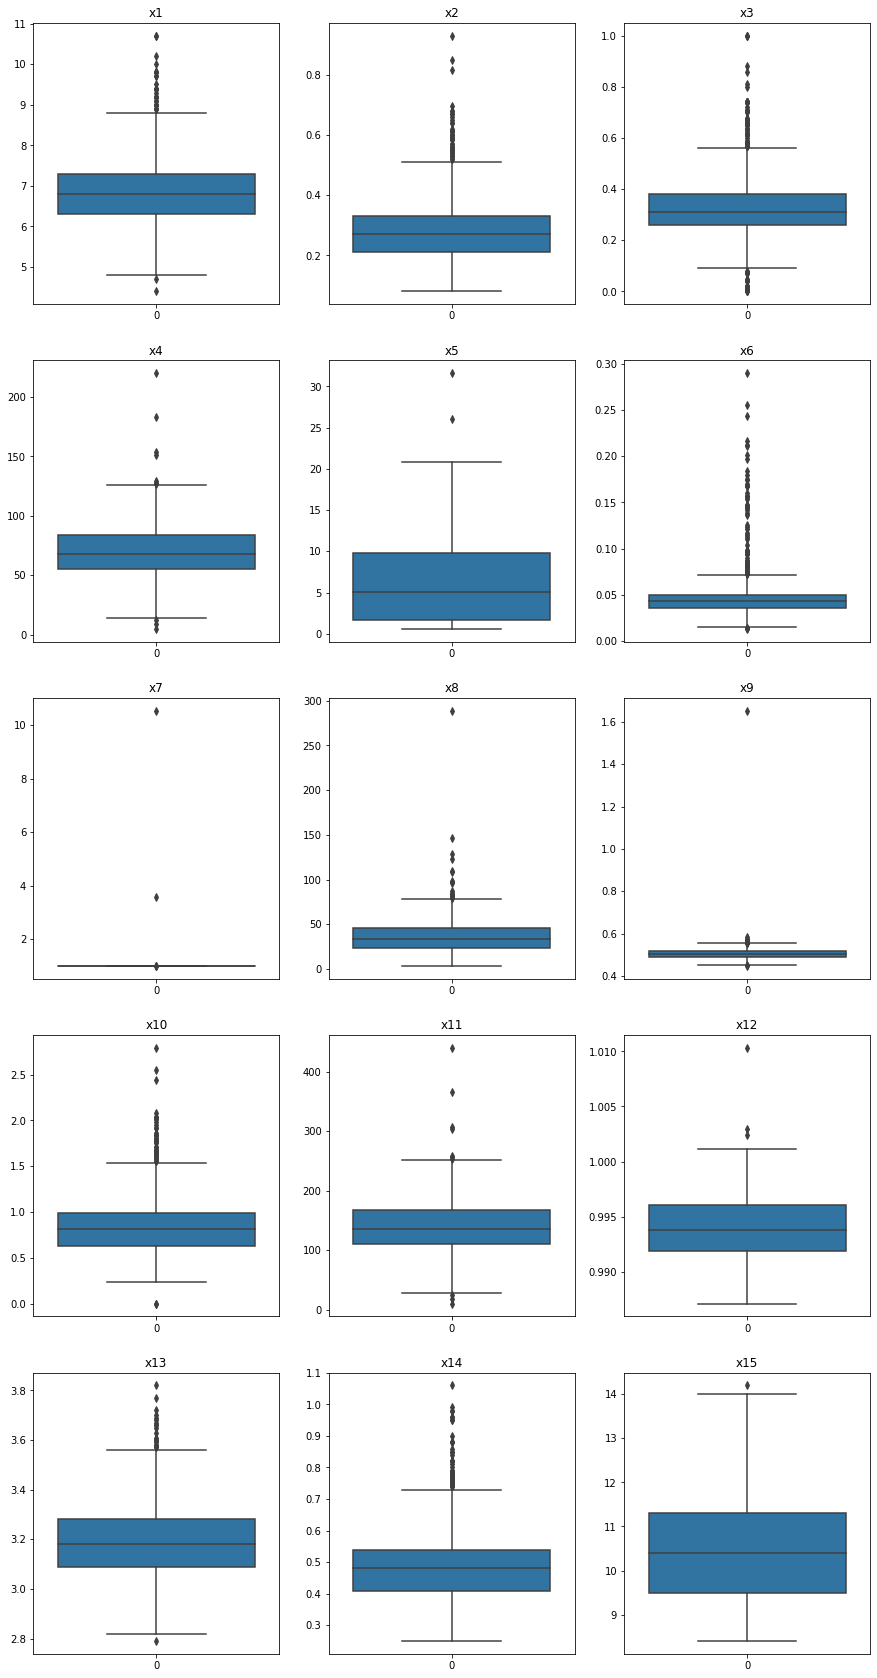

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(15, 30))

i = 0;
for row in range(5):
  for col in range(3):
    sns.boxplot(ax=axes[row, col], data=dftest[dftest.columns[i]])
    axes[row, col].set_title(dftest.columns[i])
    i += 1

In [ ]:
dftest.isnull().sum()

x1      7
x2      2
x3     14
x4      0
x5     15
x6      6
x7      6
x8     13
x9      2
x10     4
x11     0
x12     3
x13     0
x14     0
x15    39
dtype: int64

In [ ]:
#replacing missing values in x1 and x15 with mean values
dftest['x1'] = dftest['x1'].fillna(dftest['x1'].mean())
dftest['x15'] = dftest['x15'].fillna(dftest['x15'].mean())

#replacing missing values with median values
cols_to_avoid = ['x1', 'x4', 'x11', 'x13', 'x14', 'x15']
for col in dftest.columns:
  if col not in cols_to_avoid:
    dftest[col] = dftest[col].fillna(dftest[col].median())

dftest.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
dtype: int64

In [ ]:
for col in dftest.columns:
  Q1 = dftest[col].quantile(0.25)
  Q3 = dftest[col].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  dftest[col]=np.where(dftest[col]>upper_whisker,upper_whisker,np.where(dftest[col]<lower_whisker,lower_whisker,dftest[col]))

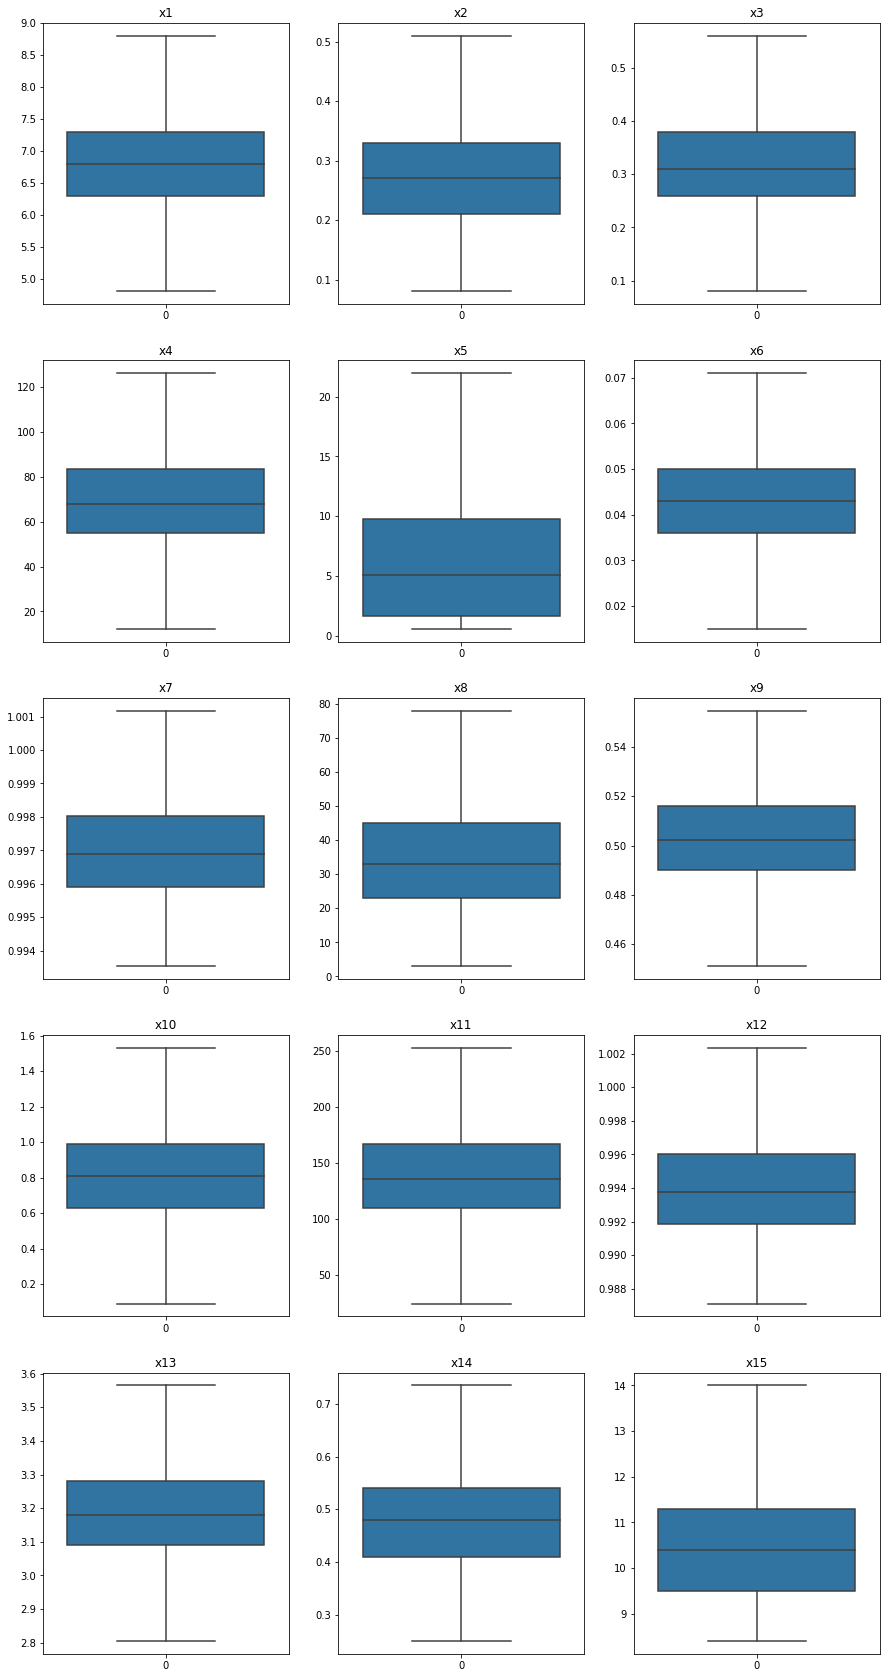

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(15, 30))

i = 0;
for row in range(5):
  for col in range(3):
    sns.boxplot(ax=axes[row, col], data=dftest[dftest.columns[i]])
    axes[row, col].set_title(dftest.columns[i])
    i += 1

In [ ]:
dftest.isna().sum()

In [ ]:
dftest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,7.0,0.51,0.08,53.5,1.0,0.036,0.996494,39.0,0.505150,1.53,107.0,0.99300,3.20,0.32,9.0
1,7.4,0.34,0.30,84.5,14.9,0.037,0.998489,70.0,0.511883,1.02,169.0,0.99698,3.25,0.37,10.4
2,7.0,0.27,0.29,99.5,3.9,0.059,0.998048,28.0,0.549003,0.81,199.0,0.99610,3.54,0.59,10.3
3,5.9,0.25,0.27,40.5,1.5,0.029,0.994585,37.0,0.505150,0.75,81.0,0.98920,3.20,0.46,12.2
4,6.6,0.30,0.24,60.5,1.2,0.034,0.996644,17.0,0.495544,0.90,121.0,0.99330,3.13,0.36,9.2


In [ ]:
dftest['x5'] = np.log(dftest['x5'])
dftest['x6'] = np.log(dftest['x6'])
dftest['x8'] = np.reciprocal(dftest['x8'])
dftest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,7.0,0.51,0.08,53.5,0.000000,-3.324236,0.996494,0.025641,0.505150,1.53,107.0,0.99300,3.20,0.32,9.0
1,7.4,0.34,0.30,84.5,2.701361,-3.296837,0.998489,0.014286,0.511883,1.02,169.0,0.99698,3.25,0.37,10.4
2,7.0,0.27,0.29,99.5,1.360977,-2.830218,0.998048,0.035714,0.549003,0.81,199.0,0.99610,3.54,0.59,10.3
3,5.9,0.25,0.27,40.5,0.405465,-3.540459,0.994585,0.027027,0.505150,0.75,81.0,0.98920,3.20,0.46,12.2
4,6.6,0.30,0.24,60.5,0.182322,-3.381395,0.996644,0.058824,0.495544,0.90,121.0,0.99330,3.13,0.36,9.2


In [ ]:
dftest.to_csv('cleaned_test.csv')
files.download('cleaned_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded = files.upload()

Saving cleaned_test.csv to cleaned_test (1).csv


In [ ]:
dfcheck = pd.read_csv('cleaned_test (1).csv')
dfcheck.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,7.0,0.51,0.08,53.5,0.000000,-3.324236,0.996494,0.025641,0.505150,1.53,107.0,0.99300,3.20,0.32,9.0
1,7.4,0.34,0.30,84.5,2.701361,-3.296837,0.998489,0.014286,0.511883,1.02,169.0,0.99698,3.25,0.37,10.4
2,7.0,0.27,0.29,99.5,1.360977,-2.830218,0.998048,0.035714,0.549003,0.81,199.0,0.99610,3.54,0.59,10.3
3,5.9,0.25,0.27,40.5,0.405465,-3.540459,0.994585,0.027027,0.505150,0.75,81.0,0.98920,3.20,0.46,12.2
4,6.6,0.30,0.24,60.5,0.182322,-3.381395,0.996644,0.058824,0.495544,0.90,121.0,0.99330,3.13,0.36,9.2


In [ ]:
dfcheck.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
dtype: int64

In [ ]:
dfout.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y,x5log,x6log,x8inverse
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6,1.824549,-3.473768,0.023810
1,6.1,0.41,0.09,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6,0.470004,-2.764621,0.027778
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7,1.526056,-3.611918,0.034483
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6,0.530628,-3.057608,0.062500
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6,-0.105361,-3.473768,0.034483


In [ ]:
uploaded = files.upload()

Saving outliers_replaced_training.csv to outliers_replaced_training (1).csv


In [ ]:
dffinal = pd.read_csv('outliers_replaced_training (1).csv')
dffinal.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,1,6.1,0.41,0.09,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [ ]:
dffinal.drop(columns = ['Unnamed: 0'], inplace = True)
dffinal.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,6.1,0.41,0.09,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [ ]:
dffinal.shape

(2877, 16)

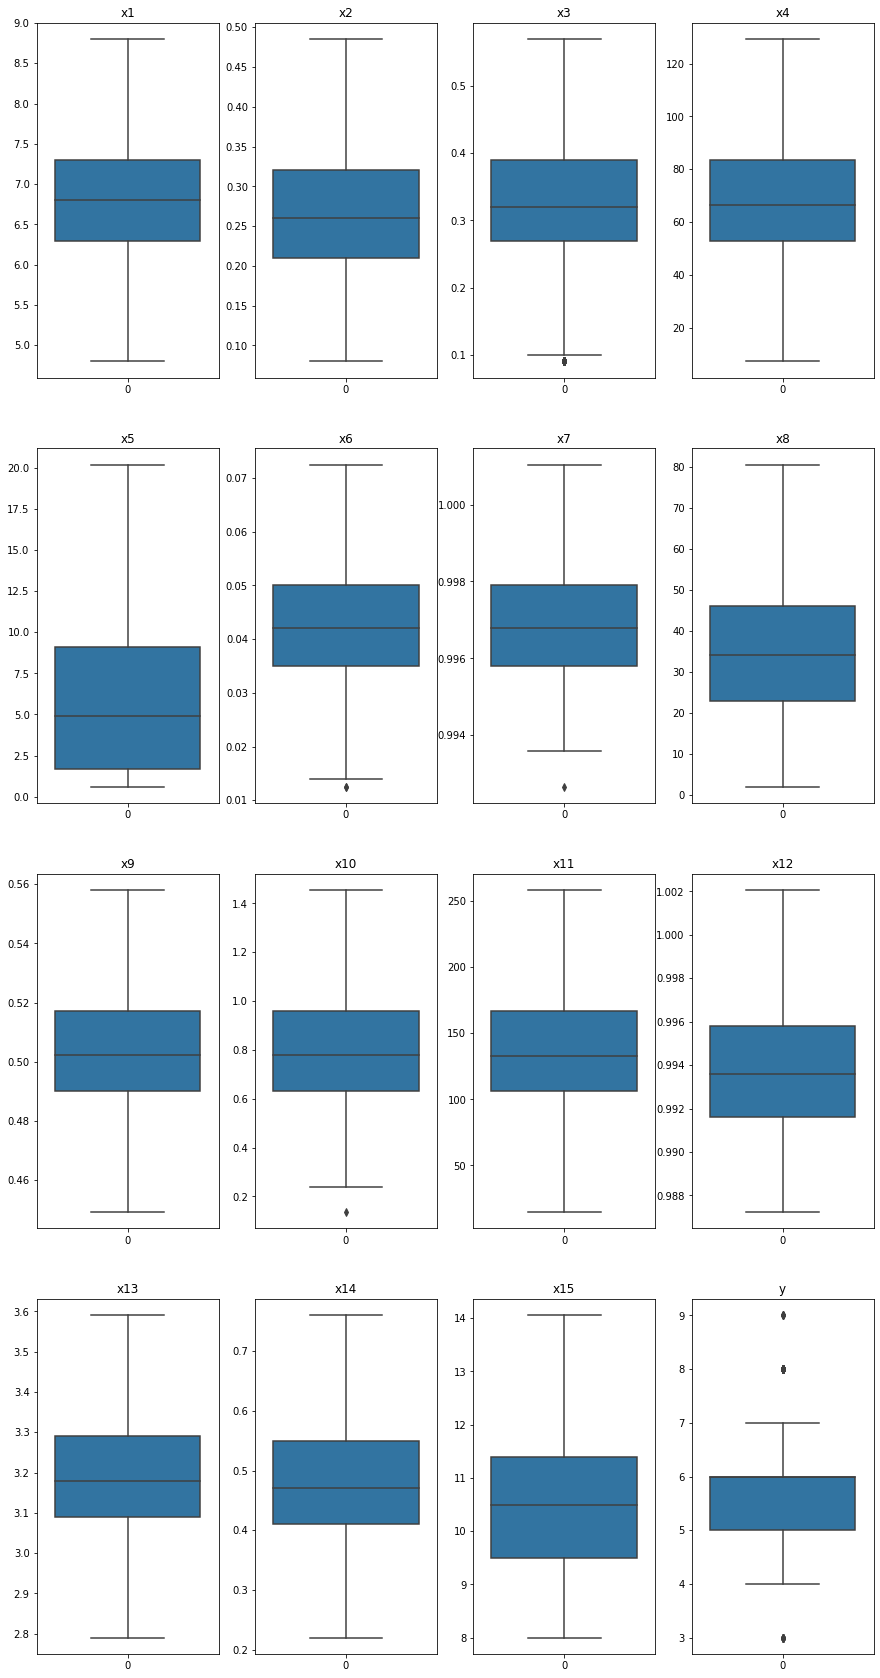

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(15, 30))

i = 0;
for row in range(4):
  for col in range(4):
    sns.boxplot(ax=axes[row, col], data=dffinal[dffinal.columns[i]])
    axes[row, col].set_title(dffinal.columns[i])
    i += 1

In [ ]:
dffinal.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,6.1,0.41,0.09,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [ ]:
dffinal['x5'] = np.log(dffinal['x5'])
dffinal['x6'] = np.log(dffinal['x6'])
dffinal['x8'] = np.reciprocal(dffinal['x8'])
dffinal.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.34,0.37,66.5,1.824549,-3.473768,0.995369,0.023810,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,6.1,0.41,0.09,43.5,0.470004,-2.764621,0.995691,0.027778,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,7.5,0.26,0.30,46.0,1.526056,-3.611918,0.995414,0.034483,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,7.4,0.20,0.29,50.0,0.530628,-3.057608,0.996208,0.062500,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,7.3,0.23,0.24,43.0,-0.105361,-3.473768,0.994616,0.034483,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [ ]:
dffinal.isna().sum()


In [ ]:
dffinal.to_csv('final_training.csv')
files.download('final_training.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded = files.upload()

Saving final_training.csv to final_training (1).csv


In [ ]:
dffinalcheck = pd.read_csv('final_training (1).csv')
dffinalcheck.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.34,0.37,66.5,1.824549,-3.473768,0.995369,0.023810,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,6.1,0.41,0.09,43.5,0.470004,-2.764621,0.995691,0.027778,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,7.5,0.26,0.30,46.0,1.526056,-3.611918,0.995414,0.034483,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,7.4,0.20,0.29,50.0,0.530628,-3.057608,0.996208,0.062500,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,7.3,0.23,0.24,43.0,-0.105361,-3.473768,0.994616,0.034483,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [ ]:
dffinalcheck.shape

(2877, 16)

In [ ]:
dffinalcheck.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
y      0
dtype: int64